=== Part (b): fraction of H atoms fast enough for n = 1 → 2 excitation ===

1. Excitation energy and threshold speed
   Bohr energies: Eₙ = −13.6 eV · n⁻²
   E₁ = -13.6 eV,  E₂ = -3.4 eV
   ΔE = E₂ − E₁ ≈ 10.2 eV
   In joules: ΔE ≈ 1.634×10⁻¹⁸ J

   Threshold speed from ½ m v_min² = ΔE:
      v_min = √(2 ΔE ÷ m)
   Numerically: v_min ≈ 4.424×10⁴ m/s

2. Maxwell–Boltzmann speed distribution at 10⁴ K
   f(v) = 4 π (m ÷ 2 π k T)³ᐟ² v² exp[− m v² ÷ (2 k T)]
   v_mean ≈ 1.451×10⁴ m/s
   v_mp   ≈ 1.286×10⁴ m/s

3. Tail probability F = ∫[v_min, ∞) f(v) dv
   Use v_max = 7 v_mp as numerical infinity:
      v_max ≈ 9.001×10⁴ m/s
   RK4 with n = 5000 steps gives:
      F ≈ 2.922793e-05  (≈ 2.923×10⁻⁵)

Interpretation: about one atom in 10⁵ has enough kinetic energy
to excite hydrogen from n = 1 to n = 2 at T = 10⁴ K.



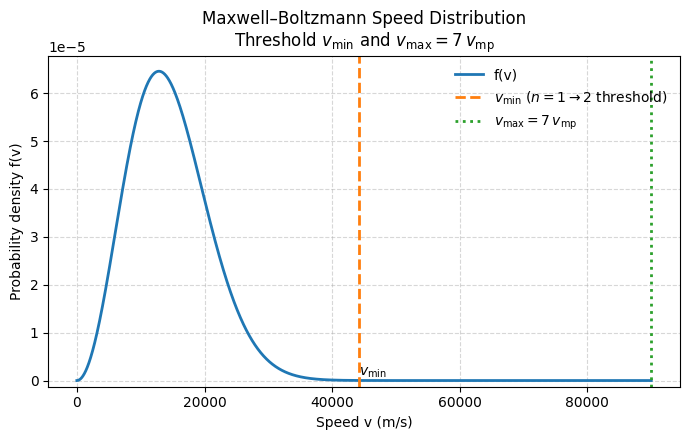

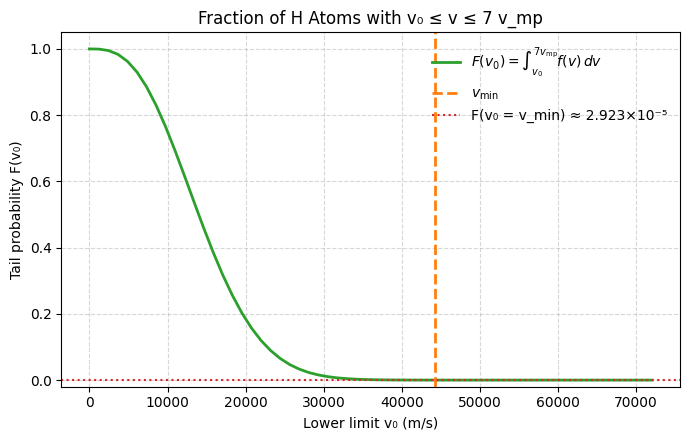

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- PHYSICAL CONSTANTS ----------
k_B = 1.380649e-23          # Boltzmann constant, J K⁻¹
T   = 1.0e4                 # temperature, K
m_H = 1.67e-27              # hydrogen atom mass, kg

eV_to_J = 1.602176634e-19   # 1 eV in J

# ---------- HYDROGEN ENERGY LEVELS ----------
def E_n_eV(n):
    # Bohr levels: Eₙ = −13.6 eV · n⁻²
    return -13.6 / n**2

E1_eV = E_n_eV(1)
E2_eV = E_n_eV(2)
DeltaE_eV = E2_eV - E1_eV
DeltaE_J  = DeltaE_eV * eV_to_J

# Threshold speed: ½ m v_min² = ΔE
v_min = np.sqrt(2 * DeltaE_J / m_H)

# ---------- MAXWELL–BOLTZMANN SPEED PDF ----------
def f_MB(v):
    prefactor = (m_H / (2 * np.pi * k_B * T)) ** 1.5
    return 4 * np.pi * prefactor * v**2 * np.exp(-m_H * v**2 / (2 * k_B * T))

# ---------- RK4 INTEGRATION IN v ----------
def integrate_rk4_v(func, a, b, n):
    h = (b - a) / n
    I = 0.0
    v = a
    for _ in range(n):
        k1 = func(v)
        k2 = func(v + 0.5*h)
        k3 = func(v + 0.5*h)
        k4 = func(v + h)
        I += (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
        v += h
    return I

# Speeds
v_mean = np.sqrt(8 * k_B * T / (np.pi * m_H))
v_rms  = np.sqrt(3 * k_B * T / m_H)
v_mp   = np.sqrt(2 * k_B * T / m_H)   # most probable speed

# Effective infinity: v_max = 7 v_mp
v_max = 7.0 * v_mp

n_steps = 5000
fraction = integrate_rk4_v(f_MB, v_min, v_max, n_steps)

# ---------- NUMBER FORMAT WITH UNICODE EXPONENTS ----------
_sup_map = str.maketrans("0123456789-", "⁰¹²³⁴⁵⁶⁷⁸⁹⁻")
def sci_uni(x, digits=3):
    if x == 0:
        return f"{0:.{digits}f}"
    expo = int(np.floor(np.log10(abs(x))))
    mant = x / 10**expo
    exp_str = str(expo).translate(_sup_map)
    return f"{mant:.{digits}f}×10{exp_str}"

# ---------- TEXT OUTPUT ----------
print("=== Part (b): fraction of H atoms fast enough for n = 1 → 2 excitation ===\n")

print("1. Excitation energy and threshold speed")
print("   Bohr energies: Eₙ = −13.6 eV · n⁻²")
print(f"   E₁ = {E1_eV:.1f} eV,  E₂ = {E2_eV:.1f} eV")
print("   ΔE = E₂ − E₁ ≈ 10.2 eV")
print(f"   In joules: ΔE ≈ {sci_uni(DeltaE_J)} J\n")

print("   Threshold speed from ½ m v_min² = ΔE:")
print("      v_min = √(2 ΔE ÷ m)")
print(f"   Numerically: v_min ≈ {sci_uni(v_min)} m/s\n")

print("2. Maxwell–Boltzmann speed distribution at 10⁴ K")
print("   f(v) = 4 π (m ÷ 2 π k T)³ᐟ² v² exp[− m v² ÷ (2 k T)]")
print(f"   v_mean ≈ {sci_uni(v_mean)} m/s")
print(f"   v_mp   ≈ {sci_uni(v_mp)} m/s\n")

print("3. Tail probability F = ∫[v_min, ∞) f(v) dv")
print("   Use v_max = 7 v_mp as numerical infinity:")
print(f"      v_max ≈ {sci_uni(v_max)} m/s")
print(f"   RK4 with n = {n_steps} steps gives:")
print(f"      F ≈ {fraction:.6e}  (≈ {sci_uni(fraction)})\n")

print("Interpretation: about one atom in 10⁵ has enough kinetic energy")
print("to excite hydrogen from n = 1 to n = 2 at T = 10⁴ K.\n")

# ---------- PLOT 1: f(v) with v_min and v_max ----------
v_vals = np.linspace(0, v_max, 2000)
f_vals = f_MB(v_vals)

fig1, ax1 = plt.subplots(figsize=(7, 4.5))

ax1.plot(v_vals, f_vals, color="C0", lw=2, label="f(v)")

ax1.axvline(
    v_min, color="C1", lw=2, ls="--",
    label=r"$v_{\min}$ ($n = 1 \rightarrow 2$ threshold)"
)

ax1.axvline(
    v_max, color="C2", lw=2, ls=":",
    label=r"$v_{\max} = 7\,v_{\mathrm{mp}}$"
)

ax1.text(
    v_min, f_MB(v_min),
    r"$v_{\min}$",
    fontsize=10,
    ha="left", va="bottom"
)

ymin = -0.02 * f_vals.max()
ymax = 1.05 * f_vals.max()
ax1.set_ylim(ymin, ymax)

ax1.set_xlabel("Speed v (m/s)")
ax1.set_ylabel("Probability density f(v)")
ax1.set_title("Maxwell–Boltzmann Speed Distribution\n"
              r"Threshold $v_{\min}$ and $v_{\max}=7\,v_{\mathrm{mp}}$")

ax1.legend(loc="upper right", frameon=False)
ax1.grid(True, which="both", ls="--", alpha=0.5)
fig1.tight_layout()

# ---------- PLOT 2: Tail probability F(v0) vs v0 ----------
v0_vals = np.linspace(0, 0.8 * v_max, 60)
F_vals = [integrate_rk4_v(f_MB, v0, v_max, n_steps) for v0 in v0_vals]
F_vals = np.array(F_vals)

fig2, ax2 = plt.subplots(figsize=(7, 4.5))

ax2.plot(
    v0_vals, F_vals, color="C2", lw=2,
    label=r"$F(v_0) = \int_{v_0}^{7 v_{\mathrm{mp}}} f(v)\,dv$"
)
ax2.axvline(v_min, color="C1", lw=2, ls="--", label=r"$v_{\min}$")
ax2.axhline(
    fraction, color="C3", lw=1.5, ls=":",
    label=f"F(v₀ = v_min) ≈ {sci_uni(fraction)}"
)

ax2.set_xlabel("Lower limit v₀ (m/s)")
ax2.set_ylabel("Tail probability F(v₀)")
ax2.set_title("Fraction of H Atoms with v₀ ≤ v ≤ 7 v_mp")

ax2.set_ylim(-0.02 * F_vals.max(), 1.05 * F_vals.max())
ax2.legend(loc="upper right", frameon=False)
ax2.grid(True, which="both", ls="--", alpha=0.5)
fig2.tight_layout()

# ---- SAVE FIGURES FOR QUESTION 2(b) ----
fig1.savefig("2b_tail_setup_vmin_vmax.png", dpi=300, bbox_inches="tight")
fig2.savefig("2b_tail_probability_vs_v0.png", dpi=300, bbox_inches="tight")

plt.show()
